In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from math import factorial

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formart = 'svg'

In [3]:
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок

In [4]:
def combinations(n, k):
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

## Выборка данных по BRENT  с 01/01/95 по 01/02/2020  

In [5]:
df = pd.read_csv('ICE.BRN_950101_200201.csv')

In [6]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [7]:
df['DATE'].dtype

dtype('<M8[ns]')

In [8]:
df.head(5)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,1995-01-01,0,16.17,17.57,15.70,17.05,0
1,1995-02-01,0,17.09,17.52,16.76,17.22,0
2,1995-03-01,0,17.25,18.39,16.16,18.00,0
3,1995-04-01,0,17.95,19.41,17.79,19.31,0
4,1995-05-01,0,19.50,19.61,17.28,17.67,0


In [9]:
df.shape

(301, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
DATE     301 non-null datetime64[ns]
TIME     301 non-null int64
OPEN     301 non-null float64
HIGH     301 non-null float64
LOW      301 non-null float64
CLOSE    301 non-null float64
VOL      301 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 16.5 KB


Дисперсия BRENT OPEN

In [11]:
np.std(df.OPEN)**2

1080.7960477389877

Среднеквадратичное отклоненние BRENT OPEN

In [12]:
sigma=np.std(df.OPEN)
sigma

32.87546269999842

Средняя BRENT OPEN

In [13]:
M = df.OPEN.mean()
M

55.51833887043187

Размер выборки, количество месяцев

In [14]:
n=len(df.OPEN)
n

301

Доверительный интервал, который с заданной надежностью $\alpha $ покрывает оцениваемый параметр.

Доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 55.52, а объем выборки n = 301,  Среднеквадратичное отклоненние 32.88

In [15]:
T1 = M-1.96*sigma/math.sqrt(n)
T1

51.80431494156894

In [16]:
T2 = M+1.96*sigma/math.sqrt(n)
T2

59.2323627992948

T1 < $\alpha $ < T2

C:\Users\vozne\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

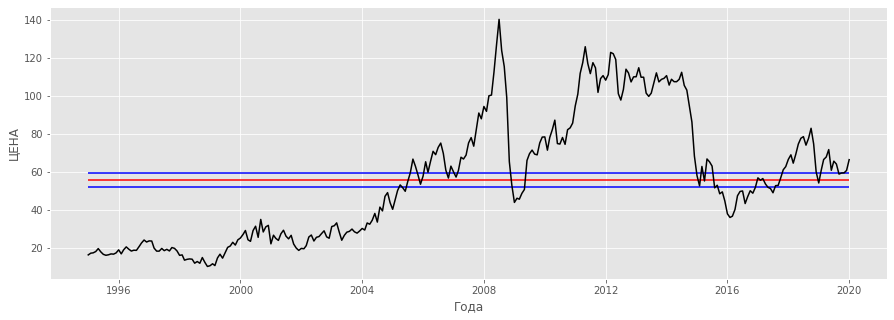

In [17]:
plt.plot(df.DATE, df.OPEN, color='black')
plt.hlines(M, '1995-01-01', '2020-01-01',color='red')
plt.hlines(T1, '1995-01-01', '2020-01-01',color='blue')
plt.hlines(T2, '1995-01-01', '2020-01-01',color='blue')
plt.xlabel("Года")
plt.ylabel("ЦЕНА")
plt.show

Сократим интервал, убрав период где цена была ниже 40 дол. 2005-01-01

In [18]:
df1 = df.loc[df.DATE >= '2005-01-01']

In [19]:
sigma=np.std(df1.OPEN)
sigma

24.465650114600493

In [20]:
M = df1.OPEN.mean()
M

77.03254143646406

In [21]:
n=len(df1.OPEN)
n

181

Доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 77,032, а объем выборки n = 181, Среднеквадратичное отклоненние 24,46

In [22]:
T1 = M-1.96*sigma/math.sqrt(n)
T1

73.46824723165854

In [23]:
T2 = M+1.96*sigma/math.sqrt(n)
T2

80.59683564126958

<function matplotlib.pyplot.show(*args, **kw)>

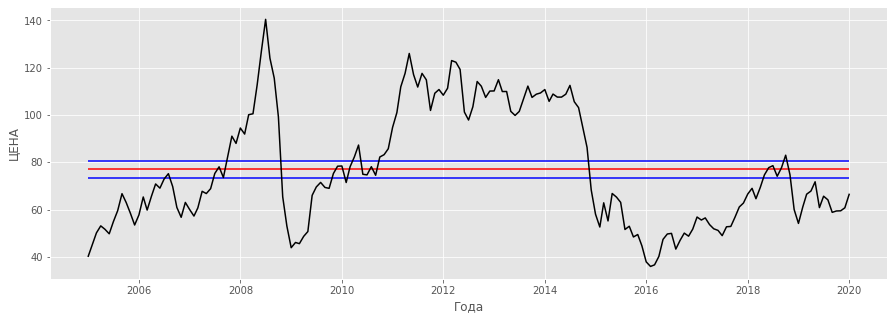

In [24]:
plt.plot(df1.DATE, df1.OPEN, color='black')
plt.hlines(M, '2005-01-01', '2020-01-01',color='red')
plt.hlines(T1, '2005-01-01', '2020-01-01',color='blue')
plt.hlines(T2, '2005-01-01', '2020-01-01',color='blue')
plt.xlabel("Года")
plt.ylabel("ЦЕНА")
plt.show

Найдем дневной разброс цены - HL (макс цена минус мин) и CO (цена закрытия минус цена открытия) 

In [25]:
df1['HL'] = df1['HIGH'] - df1['LOW']
df1['CO'] = df1['CLOSE'] - df1['OPEN']

C:\Users\vozne\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vozne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df1.head(5)

,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,HL,CO
120,2005-01-01,0,40.24,47.09,38.74,45.87,0,8.35,5.63
121,2005-02-01,0,45.42,50.28,41.60,50.14,0,8.68,4.72
122,2005-03-01,0,50.12,56.33,49.28,53.05,0,7.05,2.93
123,2005-04-01,0,53.08,55.93,48.51,49.33,0,7.42,-3.75
124,2005-05-01,0,51.65,51.92,46.20,49.83,0,5.72,-1.82


In [27]:
df_b=df1.loc[df1.CO >= 0]

In [28]:
df_m=df1.loc[df1.CO < 0]

In [29]:
len(df_b) #кол мес закрытых в плюс

102

In [30]:
len(df_m) # кол мес закрытых в минус 

79

Количество месяцев закрытых в плюс в данном периоде больше на (102-79)/102= 22 процента

Посмотрим на грацике как были распределены месяца в периоде с положительным и отрицательным результатом 

<function matplotlib.pyplot.show(*args, **kw)>

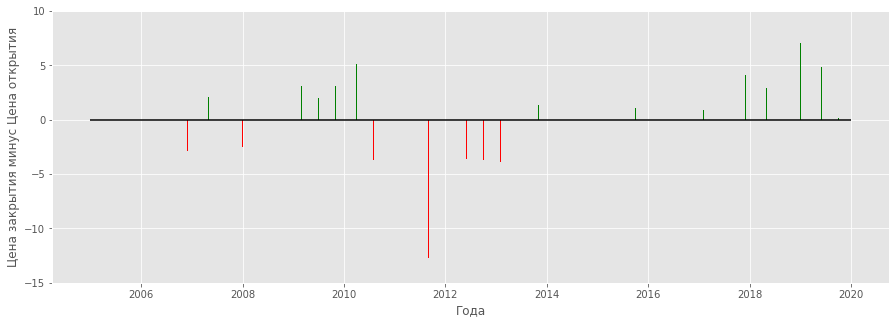

In [31]:
plt.bar(df_b.DATE, df_b.CO, color='green')
plt.bar(df_m.DATE, df_m.CO, color='red')
plt.hlines(0, '2005-01-01', '2020-01-01',color='black')
plt.xlabel("Года")
plt.ylabel("Цена закрытия минус Цена открытия")
plt.ylim(-15,10)
plt.grid(True)
plt.show

Посмотрим на графике как были распределены месяца в периоде с всплесками активности в которые был максимальный разброс цен.

<function matplotlib.pyplot.show(*args, **kw)>

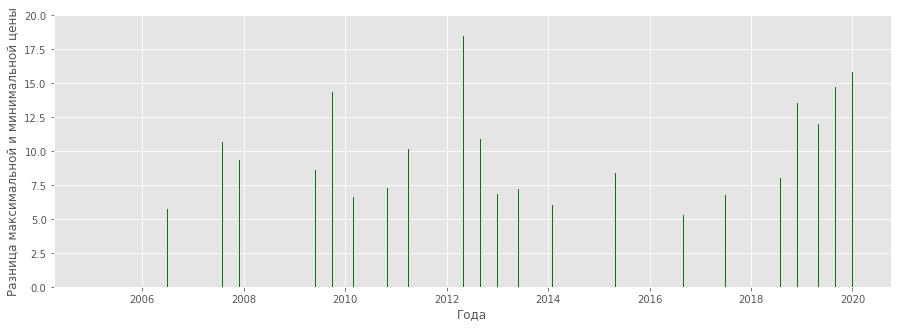

In [32]:
plt.bar(df1.DATE, df1.HL, color='green')
plt.xlabel("Года")
plt.ylabel("Разница максимальной и минимальной цены")
plt.ylim(0,20)
plt.show

## Проверим связь изменения BRENT от курса USD

In [32]:
df_usd= pd.read_csv('EURUSD_050101_200201.csv')

In [33]:
df_usd['DATE'] = pd.to_datetime(df_usd['DATE'])

In [34]:
df_usd['DATE'].dtype

dtype('<M8[ns]')

Найдем ковариацию этих двух величин.

In [35]:
y= np.array(df_usd.OPEN)

In [36]:
X = np.array(df1.OPEN)

In [37]:
np.corrcoef(X,y)

array([[1.        , 0.66262674],
       [0.66262674, 1.        ]])

Вывод : Коэффициент 0,66- положительный и говорит о наличии прямой зависимости.

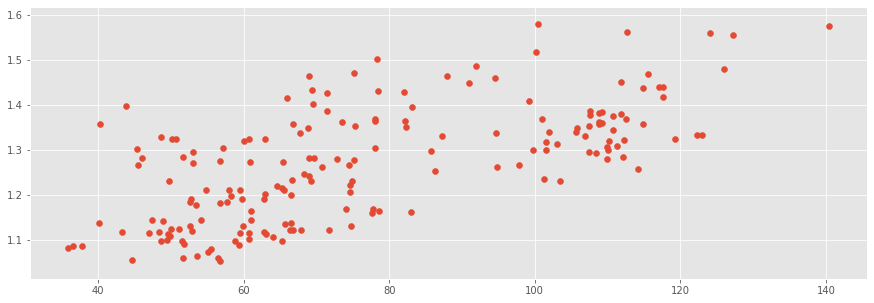

In [38]:
plt.scatter(X,y)
plt.show()

In [39]:
n= len(y)
n

181

In [40]:
b = (n*(np.sum(X*y))-(np.sum(X)*np.sum(y)))/(n*(np.sum(X**2))-((np.sum(X)**2)))
b

0.003413186749705256

In [41]:
a=np.mean(y)-b*np.mean(X)
a

1.0076744894994591

In [42]:
y_hat = a + b * X

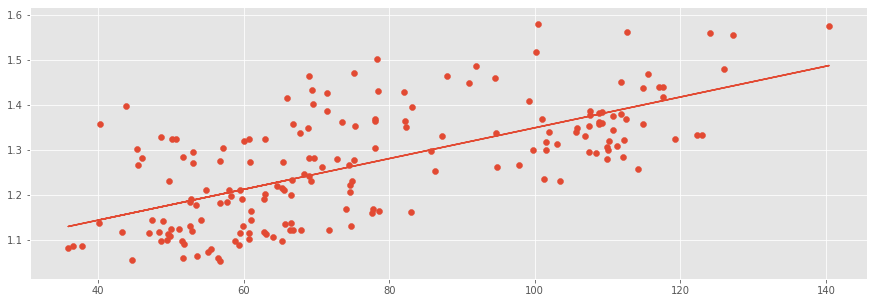

In [43]:
plt.scatter (X,y)
plt.plot(X,y_hat)
plt.show()

Другой способ найти коэффицикеты a,b

In [44]:
X=X.reshape((181,1))

In [45]:
y=y.reshape((181,1))

In [46]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T @ y)
B

array([[0.01529574]])

In [47]:
X=np.hstack([np.ones((181,1)),X])

In [48]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T@y)
B

array([[1.00767449],
       [0.00341319]])

In [49]:
a=1.00767449

In [50]:
b=0.00341319

Посчитаем коэффициент линейной регрессии , используя градиентный спуск (без intercept).

In [51]:
y= np.array(df_usd.OPEN)

In [52]:
X = np.array(df1.OPEN)

In [53]:
n=len(X)

In [54]:
def mse_(B1,y=y,X=X,n=10):
    return np.sum((B1*X-y)**2)/n

In [55]:
alpha = 1e-6
alpha

1e-06

In [56]:
B1=1

In [57]:
for i in range(5000):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%500==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i,B1=B1,mse=mse_(B1)))

Iteration: 0, B1=0.9871346803365945, mse=111675.81075041622
Iteration: 500, B1=0.01665041106460037, mse=2.0622510176259565
Iteration: 1000, B1=0.015297627013370764, mse=1.8452653530503043
Iteration: 1500, B1=0.015295741331400216, mse=1.8452649314402187
Iteration: 2000, B1=0.015295738702897545, mse=1.8452649314394
Iteration: 2500, B1=0.015295738699233606, mse=1.8452649314394
Iteration: 3000, B1=0.015295738699228558, mse=1.8452649314393998
Iteration: 3500, B1=0.015295738699228558, mse=1.8452649314393998
Iteration: 4000, B1=0.015295738699228558, mse=1.8452649314393998
Iteration: 4500, B1=0.015295738699228558, mse=1.8452649314393998


In [58]:
mse_(0.015295738699228558)

1.8452649314393998

Посчитаем коэффициент линейной регрессии , используя градиентный спуск c intercept.

In [59]:
y= np.array(df_usd.OPEN)

In [60]:
X = np.array(df1.OPEN)

In [61]:
n=len(X)

In [62]:
alpha = 1e-6

In [63]:
B1=0.1

In [64]:
B0=1

In [65]:
def mse_(B0,B1,y=y,X=X,n=10):
    return np.sum((B0+B1*X-y)**2)/n

In [68]:
for i in range(45000000):
    y_pred=B0+B1*X
    B0 -=alpha*(2/n)*np.sum((y_pred-y))
    B1 -=alpha*(2/n)*np.sum((y_pred-y)*X)
    if i%7000000==0:
        print('Iteration: {i}, B0={B0}, B1={B1}, mse={mse}'.format(i=i,B0=B0,B1=B1,mse=mse_(B0,B1)))

Iteration: 0, B0=0.9999851346935912, B1=0.09873926010996464, mse=1072.5696355877426
Iteration: 7000000, B0=1.0052307590024097, B1=0.003442003755719166, mse=0.16125246854715894
Iteration: 14000000, B0=1.0069968159592846, B1=0.003421178024727704, mse=0.16124332610920006
Iteration: 21000000, B0=1.0074865631189918, B1=0.003415402818802338, mse=0.16124262304260745
Iteration: 28000000, B0=1.0076223754321616, B1=0.0034138012902172137, mse=0.161242568975778
Iteration: 35000000, B0=1.0076600376912141, B1=0.003413357168597891, mse=0.16124256481796126
Iteration: 42000000, B0=1.0076704818528452, B1=0.003413234008753119, mse=0.16124256449821922
